In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
# Read in provider table

data = pd.read_csv('../../../processed_data/provider_final.csv',index_col='Provider')
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.shape)
data.sample(5)

(5410, 46)


,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,Serves,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV55379,No,4.0,5.000000,0.0,0.000000,IP,6.5,5.250000,7.0,68.0,68.250000,4.0,0.0,1.0,0.0,1.0,9000.000000,1.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,5.00,4,4,1.00,40272,10068.00,0,0,2,1.00
PRV51578,Yes,4.0,6.131148,0.0,1.417271,Both,7.0,6.794667,7.0,73.0,72.627333,117.0,1168.0,10.0,38.0,1.0,1108.613333,78.0,4.0,0.032787,yes,6.0,yes,5.0,yes,7.0,yes,624.0,0.452830,yes,52.0,yes,4048.0,yes,382.0,yes,1.80,1280,1500,1.17,1761070,1375.84,3,115,1439,4.11
PRV57202,No,0.0,0.000000,0.0,1.581818,OP,6.0,6.278788,6.0,74.0,75.024242,0.0,85.0,0.0,3.0,1.0,247.333333,4.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,74.0,0.448485,yes,52.0,yes,2962.0,yes,378.0,yes,1.58,85,165,1.94,41370,486.71,0,20,165,1.24
PRV51308,No,0.0,0.000000,0.0,1.571429,OP,7.0,7.371429,7.0,69.0,68.428571,0.0,31.0,0.0,2.0,1.0,394.000000,0.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,13.0,0.371429,yes,49.0,yes,684.0,yes,348.0,yes,1.57,31,35,1.13,13920,449.03,0,1,35,1.00
PRV51479,No,3.0,3.846154,0.0,1.786047,Both,7.0,6.701754,7.0,74.0,72.583333,13.0,204.0,2.0,13.0,1.0,590.482456,15.0,0.0,0.000000,no,0.0,no,0.0,no,0.0,no,87.0,0.404651,yes,52.0,yes,2888.0,yes,380.0,yes,1.90,217,228,1.05,149154,687.35,0,23,218,1.33


In [3]:
# Make dummies

encode_cols = data[~data.applymap(np.isreal)].dropna(axis=1).columns.to_list()
print(encode_cols)

data[encode_cols[2:]] = data[encode_cols[2:]].applymap(lambda x: 1 if x.lower() == 'yes' else 0)
dummies = pd.get_dummies(data['Serves'],prefix='Serves_',drop_first=True)

data_dum = pd.concat([data.drop('Serves',axis=1),dummies],axis=1)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

['PotentialFraud', 'Serves', 'DupClaim_IP', 'DupClaimMultiState_IP', 'DupClaimMultiProvider_IP', 'DupClaimMultiStartDt_IP', 'DupClaim_OP', 'DupClaimMultiState_OP', 'DupClaimMultiProvider_OP', 'DupClaimMultiStartDt_OP']


In [49]:
print(data_dum.shape)
data_dum.head()

(5410, 47)


,PotentialFraud,DurationMedianIP,DurationMeanIP,DurationMedianOP,DurationMeanOP,ChronCondsMedian,ChronCondsMean,ChronConsMode,PtAgeMedian,PtAgeMean,NumPtsIP,NumPtsOP,NumStatesIP,NumStatesOP,SharePhysician,MergeAvgClaimReimbursed,NumTopCodeClaim,DupClaimNum_IP,DupClaimRatio_IP,DupClaim_IP,DupClaimStatesNum_IP,DupClaimMultiState_IP,DupClaimProviderNum_IP,DupClaimMultiProvider_IP,DupClaimStartDtNum_IP,DupClaimMultiStartDt_IP,DupClaimNum_OP,DupClaimRatio_OP,DupClaim_OP,DupClaimStatesNum_OP,DupClaimMultiState_OP,DupClaimProviderNum_OP,DupClaimMultiProvider_OP,DupClaimStartDtNum_OP,DupClaimMultiStartDt_OP,AvgDuration,NumOfPt,NumOfClm,ClmPerPt,TotalRev,RevPerPt,ClmNoPhy,ClmAllPhy,ClmNoProc,ClmPerDt,Serves__IP,Serves__OP
Provider,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PRV51001,No,4.0,5.000000,0.0,0.550000,6.0,5.760000,5.0,79.0,77.880000,5.0,19.0,1.0,1.0,1.0,4185.600000,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,11.0,0.550000,1,50.0,1,422.0,1,278.0,1,1.44,24,25,1.04,109980,4582.50,0,2,23,1.09,0,0
PRV51003,Yes,4.0,5.161290,0.0,2.357143,7.0,6.674242,6.0,71.0,69.083333,53.0,66.0,3.0,3.0,1.0,4588.409091,25.0,1.0,0.016129,1,2.0,1,2.0,1,2.0,1,25.0,0.357143,1,52.0,1,1351.0,1,372.0,1,3.67,117,132,1.13,671956,5743.21,0,4,93,1.19,0,0
PRV51004,No,0.0,0.000000,0.0,1.429530,7.0,6.812081,8.0,72.0,71.261745,0.0,138.0,0.0,9.0,1.0,350.134228,5.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,72.0,0.483221,1,52.0,1,3006.0,1,375.0,1,1.43,138,149,1.08,52480,380.29,0,12,149,1.27,0,1
PRV51005,Yes,0.0,0.000000,0.0,1.088412,7.0,6.886695,5.0,70.0,69.526180,0.0,495.0,0.0,4.0,1.0,241.124464,25.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,530.0,0.454936,1,52.0,1,3920.0,1,382.0,1,1.09,495,1165,2.35,284610,574.97,2,98,1165,3.27,0,1
PRV51007,No,5.0,5.333333,0.0,0.768116,7.0,6.986111,6.0,69.5,68.305556,3.0,56.0,1.0,2.0,1.0,468.194444,3.0,0.0,0.000000,0,0.0,0,0.0,0,0.0,0,29.0,0.420290,1,52.0,1,1816.0,1,371.0,1,0.96,58,72,1.24,36974,637.48,0,8,71,1.06,0,0


## Logistic Regression

In [50]:
# Make target and features, and tt-split

data_dum2 = data_dum.copy()
data_dum2['PotentialFraud'] = np.where(data_dum2['PotentialFraud']=='Yes', 1, 0)

y = data_dum2.iloc[:, 0]
X = data_dum2.iloc[:, 1:]

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [51]:
print(ytrain.mean())
ytest.mean()

0.09347768682334301


0.09365372766481823

### Based on F1 Score

In [52]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced')

In [53]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg = GridSearchCV(logreg, grid_logreg, scoring='f1', cv=5, n_jobs=-1)
%time grid_search_logreg.fit(Xtrain, ytrain)

CPU times: user 379 ms, sys: 96.2 ms, total: 476 ms
Wall time: 4.15 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [54]:
# grid_search_logreg.cv_results_

In [55]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg.best_params_))
print('Best F1   Score:\t%.4f' %grid_search_logreg.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg.best_estimator_.score(Xtrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xtrain)))

Best Parameters:	{'C': 1, 'penalty': 'l1'}
Best F1   Score:	0.5907
Train error:		0.10642

Confusion Matrix:
[[3065  368]
 [  35  319]]


In [56]:
print('\nRecall:')
print(319 / (319+35))
print('\nPrecision:')
print(319 / (319+368))
print('\nAccuracy:')
print((3065+319) / (368+35+3065+319))


Recall:
0.9011299435028248

Precision:
0.4643377001455604

Accuracy:
0.8935833113282281


In [57]:
labels = np.unique(ytrain)
cm = confusion_matrix(ytrain, grid_search_logreg.best_estimator_.predict(Xtrain), labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
display(cm_df)

,0,1
0,3065,368
1,35,319


In [87]:
# Feature Importance

f1_coef = pd.DataFrame(grid_search_logreg.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
f1_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
f1_coef_imp = f1_coef_abs[f1_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", f1_coef_abs.shape[0])
print(f"number of predictors after Lasso:", f1_coef_imp.shape[0])

display(f1_coef_abs)

number of predictors before Lasso: 46
number of predictors after Lasso: 40


,abs_coef,coef
DupClaimNum_IP,1.399287,1.399287
DupClaimStartDtNum_IP,1.318496,-1.318496
Serves__OP,1.042488,-1.042488
DupClaimRatio_IP,0.677534,-0.677534
DurationMedianIP,0.587542,-0.587542
DurationMeanIP,0.562381,0.562381
Serves__IP,0.558050,-0.558050
ChronCondsMean,0.462777,-0.462777
ClmPerPt,0.382756,0.382756
DupClaimStatesNum_IP,0.376885,0.376885


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by F1')]

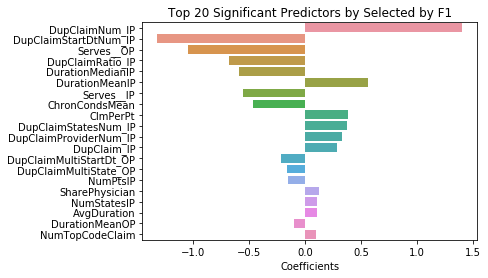

In [90]:
# Plot of Most Significant Coefs

plot_df = f1_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by F1")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

### Based on roc_auc Score

In [59]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(class_weight='balanced')

In [60]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg2 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg2 = GridSearchCV(logreg2, grid_logreg2, scoring='roc_auc', cv=5, n_jobs=-1)
%time grid_search_logreg2.fit(Xtrain, ytrain)

CPU times: user 236 ms, sys: 19.4 ms, total: 255 ms
Wall time: 1.47 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [61]:
# grid_search_logreg.cv_results_

In [62]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg2.best_params_))
print('Best roc_auc Score:\t%.4f' %grid_search_logreg2.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg2.best_estimator_.score(Xtrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg2.best_estimator_.predict(Xtrain)))

Best Parameters:	{'C': 0.1, 'penalty': 'l1'}
Best roc_auc Score:	0.9460
Train error:		0.10959

Confusion Matrix:
[[3057  376]
 [  39  315]]


In [63]:
print('\nRecall:')
print(315 / (315+39))
print('\nPrecision:')
print(315 / (315+376))
print('\nAccuracy:')
print((3059+315) / (374+39+3057+376))


Recall:
0.8898305084745762

Precision:
0.4558610709117221

Accuracy:
0.8772750910036401


In [91]:
# Feature Importance

roc_coef = pd.DataFrame(grid_search_logreg2.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
roc_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg2.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg2.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
roc_coef_imp = roc_coef_abs[roc_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", roc_coef_abs.shape[0])
print(f"number of predictors after Lasso:", roc_coef_imp.shape[0])

display(roc_coef_abs)

number of predictors before Lasso: 46
number of predictors after Lasso: 27


,abs_coef,coef
DurationMeanIP,0.601558,0.601558
DurationMedianIP,0.543815,-0.543815
DupClaim_IP,0.520847,0.520847
Serves__OP,0.420667,-0.420667
ChronCondsMean,0.395316,-0.395316
DupClaimStartDtNum_IP,0.142339,-0.142339
NumPtsIP,0.136216,-0.136216
NumStatesIP,0.128013,0.128013
NumTopCodeClaim,0.091983,0.091983
NumStatesOP,0.063787,0.063787


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by ROC_AUC')]

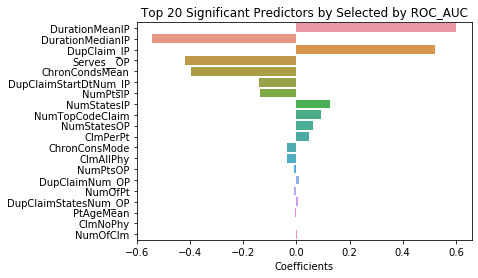

In [92]:
# Plot of Most Significant Coefs

plot_df = roc_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by ROC_AUC")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")

### Based on Recall Score

In [93]:
# Instantiate model

from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(class_weight='balanced')

In [94]:
# Gridsearch

from sklearn.model_selection import GridSearchCV

grid_logreg3 = {'penalty':['l1'], 
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logreg3 = GridSearchCV(logreg3, grid_logreg3, scoring='recall', cv=5, n_jobs=-1)
%time grid_search_logreg3.fit(Xtrain, ytrain)

CPU times: user 410 ms, sys: 170 ms, total: 580 ms
Wall time: 4.09 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [95]:
# grid_search_logreg.cv_results_

In [96]:
# Score

print('Best Parameters:\t'+ str(grid_search_logreg3.best_params_))
print('Best roc_auc Score:\t%.4f' %grid_search_logreg3.best_score_)
print("Train error:\t\t%.5f" % (1 - grid_search_logreg3.best_estimator_.score(Xtrain, ytrain)))

from sklearn.metrics import confusion_matrix

print('\nConfusion Matrix:')
print(confusion_matrix(ytrain, grid_search_logreg3.best_estimator_.predict(Xtrain)))

Best Parameters:	{'C': 1, 'penalty': 'l1'}
Best roc_auc Score:	0.8729
Train error:		0.10774

Confusion Matrix:
[[3060  373]
 [  35  319]]


In [97]:
print('\nRecall:')
print(319 / (319+35))
print('\nPrecision:')
print(319 / (319+373))
print('\nAccuracy:')
print((3060+319) / (373+35+3060+373))


Recall:
0.9011299435028248

Precision:
0.46098265895953755

Accuracy:
0.879718823223119


In [98]:
# Feature Importance

recall_coef = pd.DataFrame(grid_search_logreg3.best_estimator_.coef_.flatten(), index = Xtrain.columns, columns = ['coefficient']).sort_values(by = 'coefficient', ascending = False)
recall_coef_abs = pd.DataFrame({'abs_coef':abs(grid_search_logreg3.best_estimator_.coef_.flatten()), 'coef': grid_search_logreg3.best_estimator_.coef_.flatten()}, index = Xtrain.columns).sort_values(by = 'abs_coef', ascending = False)
recall_coef_imp = recall_coef_abs[recall_coef_abs['abs_coef']>0]

print(f"number of predictors before Lasso:", recall_coef_abs.shape[0])
print(f"number of predictors after Lasso:", recall_coef_imp.shape[0])

display(recall_coef_abs)

number of predictors before Lasso: 46
number of predictors after Lasso: 42


,abs_coef,coef
DupClaimNum_IP,1.290452,1.290452
DupClaimStartDtNum_IP,1.208678,-1.208678
Serves__OP,1.046205,-1.046205
DupClaimRatio_IP,0.675844,-0.675844
DurationMedianIP,0.587274,-0.587274
DurationMeanIP,0.561210,0.561210
Serves__IP,0.561145,-0.561145
ChronCondsMean,0.414394,-0.414394
ClmPerPt,0.380587,0.380587
DupClaimStatesNum_IP,0.375470,0.375470


[Text(0.5, 0, 'Coefficients'),
 Text(0.5, 1.0, 'Top 20 Significant Predictors by Selected by Recall')]

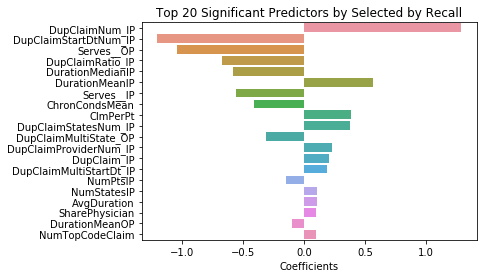

In [99]:
# Plot of Most Significant Coefs

plot_df = recall_coef_imp.iloc[:20, ]

ax = sns.barplot(y = plot_df.index, x = "coef", data = plot_df)
ax.set(xlabel = "Coefficients", title = "Top 20 Significant Predictors by Selected by Recall")

# plt.savefig("../output/lasso_coef_imp_top20.png", bbox_inches = "tight")